In [1]:
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt
np.seterr(all='print')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [42]:
var = ['x']
exp = ['-4', '-3', '-2', '-1', '1', '2', '3', '4']
oper = ['+', '-', '*']

In [107]:
def new_term():
    return '(' + choice(var) + '**' + choice(exp) + ')'

def insert(organism):
    return organism + ' ' + choice(oper) + '' + new_term()

def delete(organism):
    terms = organism.split(' ')
    if len(terms) > 1:
        terms.pop(choice(len(terms)))
        organism = ' '.join(terms)
        if organism.startswith(tuple(oper)):
            organism = organism[1:]
    else:
        organism = None
    return organism

def genesis(n_organisms):
    alive = []
    for i in range(n_organisms):
        organism = new_term()
        if select(organism):
            alive.append(organism)
    return alive

def mutate(organism):
    fate = choice(['insert', 'delete'], p=[0.1, 0.9])
    if fate == 'insert':
        organism = insert(organism)
    elif fate == 'delete':
        organism = delete(organism)
    return organism

def select(organism, max_size=5):
    x = np.array(range(10), dtype=float)
    try:
        assert organism != None
        y = eval(organism)
        assert len(y) == len(x)
        return True
    except:
        return False
    
def progeny(organism, n_children):
    children = []
    for i in range(n_children):
        child = mutate(organism)
        if select(child):
            children.append(child)
    return children

In [108]:
def plot(equation, color):
    x = np.array(range(10), dtype=float)
    y = eval(equation)
    plt.plot(x, y, color=color)
    plt.title(equation)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(alpha=0.2)
    plt.show()

def plot_population(population):
    plt.plot(population, color='grey')
    plt.title('Population', fontweight='bold')
    plt.xlabel('Generation')
    plt.ylabel('Population')
    plt.grid(alpha=0.2)
    plt.show()

In [113]:
n_organisms = 25
n_children = 2
n_generations = 10

population = []
for n in range(n_generations):
    if n == 0:
        alive = genesis(n_organisms)
    else:
        children = []
        for organism in alive:
            children += progeny(organism, n_children)
        alive = children
    if not alive:
        break
    print('Generation', n)
    print(*alive, '', sep='\n')
    population.append(len(alive))

Generation 0
(x**1)
(x**4)
(x**-3)
(x**3)
(x**3)
(x**2)
(x**-2)
(x**3)
(x**-4)
(x**3)
(x**3)
(x**4)
(x**-1)
(x**2)
(x**2)
(x**-1)
(x**-4)
(x**1)
(x**2)
(x**-4)
(x**2)
(x**1)
(x**-4)
(x**2)
(x**3)

Generation 1
(x**3) -(x**-1)
(x**4) *(x**1)
(x**4) -(x**-2)
(x**2) +(x**3)
(x**2) *(x**3)
(x**-4) +(x**1)
(x**1) -(x**-2)
(x**-4) +(x**4)

Generation 2
(x**-1)
(x**-1)
(x**4) *(x**1) +(x**-1)
(x**4)
(x**4)
(x**4) -(x**-2) +(x**-4)
(x**2)
(x**2) +(x**3) -(x**-4)
(x**2)
(x**2)
(x**-4)
(x**-4) +(x**1) *(x**-2)
(x**1)
(x**1)
(x**-4)
(x**4)

Generation 3
(x**-1) +(x**-1)
(x**4) *(x**1)
(x**4) +(x**-1)
(x**4) *(x**-2)
(x**4) *(x**-4)
(x**4) -(x**-2) +(x**-4) -(x**-1)
(x**4) -(x**-2)
(x**2) *(x**-1)
(x**2) +(x**3) -(x**-4) *(x**-4)
(x**3) -(x**-4)
(x**2) -(x**3)
(x**-4) +(x**1)
(x**-4) +(x**1)
(x**4) -(x**-2)

Generation 4
(x**-1)
(x**-1) +(x**-1) +(x**-1)
(x**1)
(x**1)
(x**-1)
(x**4)
(x**-2)
(x**4)
(x**4)
(x**4)
(x**-2) +(x**-4) -(x**-1)
(x**-2) +(x**-4) -(x**-1)
(x**-2)
(x**4)
(x**2)
(x**2)
(x**2)

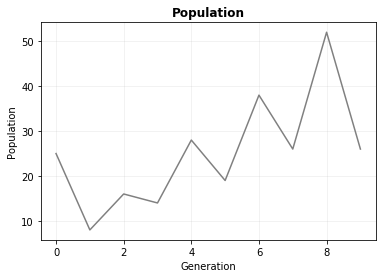

In [114]:
plot_population(population)

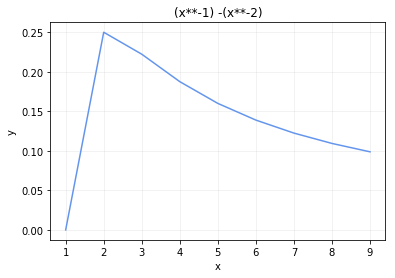

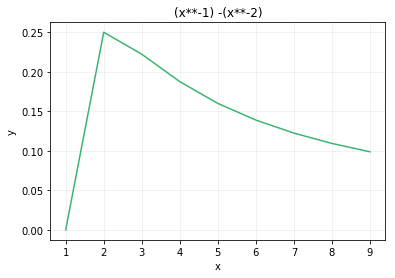

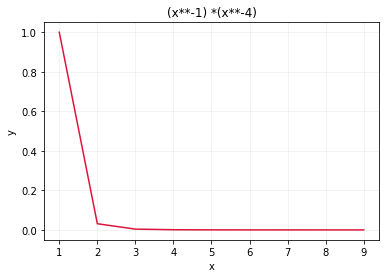

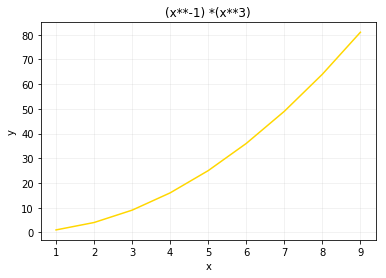

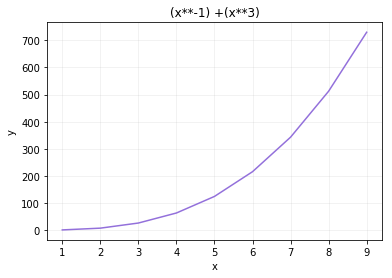

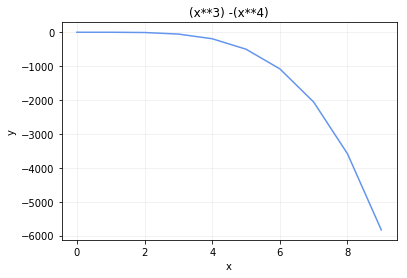

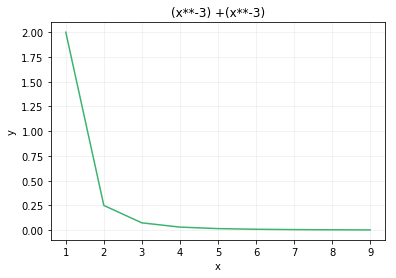

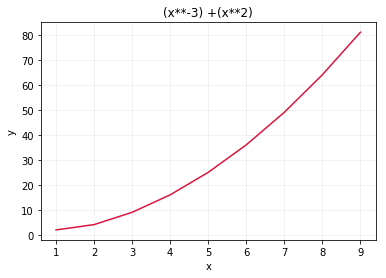

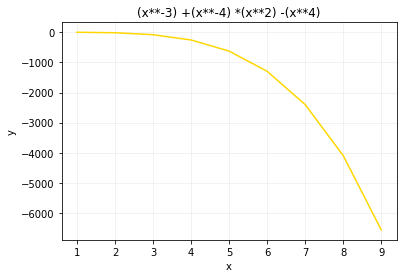

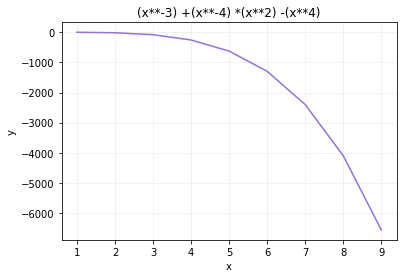

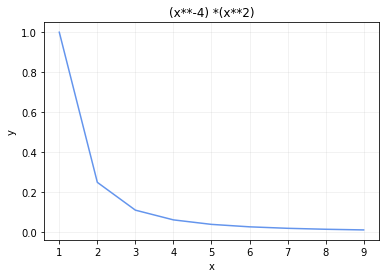

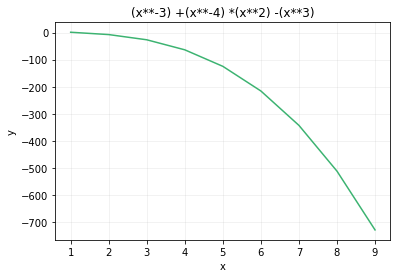

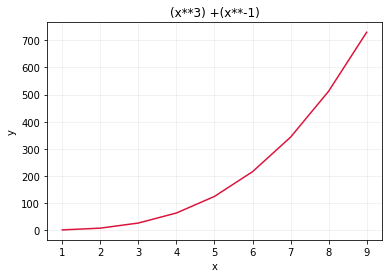

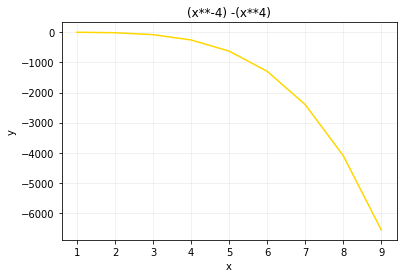

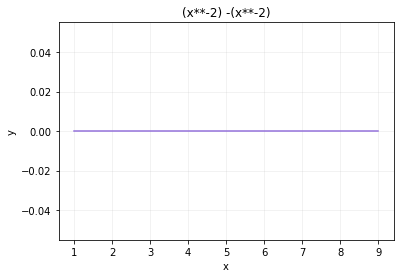

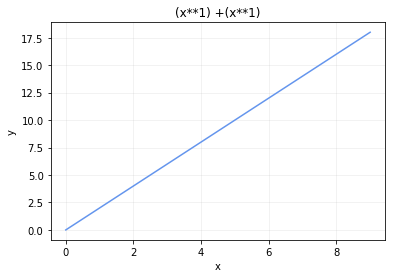

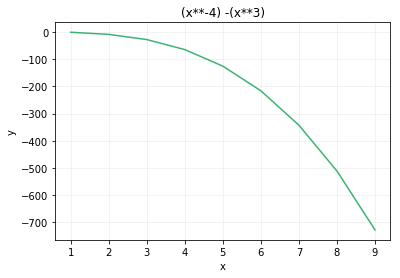

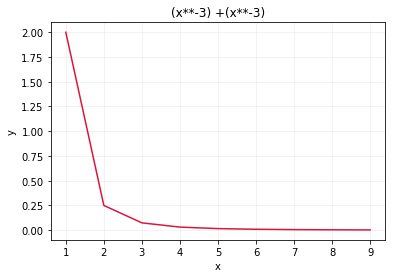

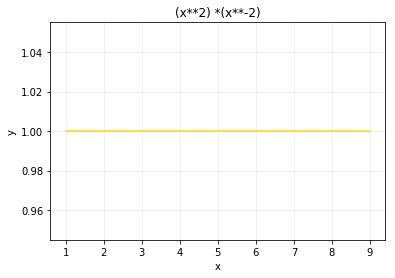

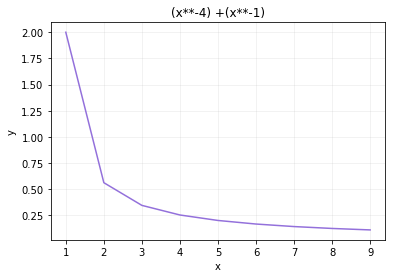

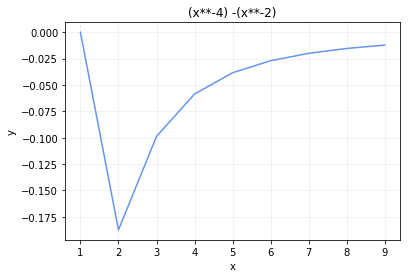

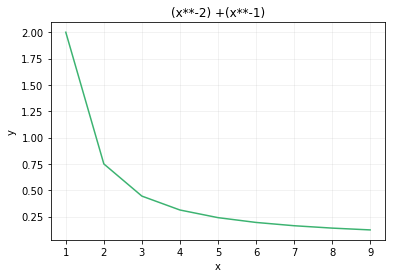

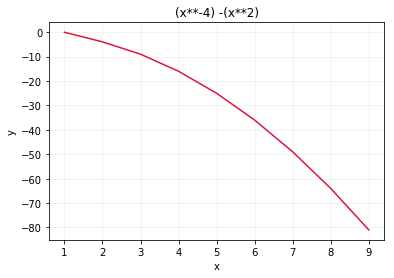

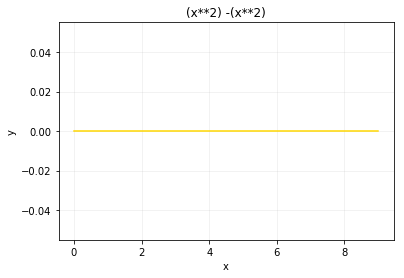

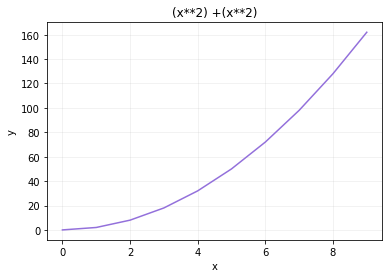

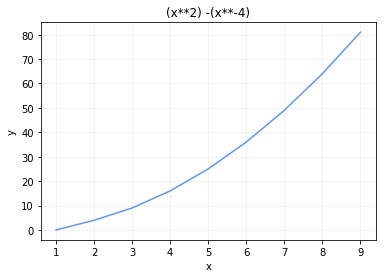

In [115]:
colors = ['cornflowerblue', 'mediumseagreen', 'crimson', 'gold', 'mediumpurple'] * ((len(alive) // 5) + 1)
for i, organism in enumerate(alive):
    plot(organism, colors[i])